# Introduction

This notebook analyzes the Seattle Airbnb dataset to answer three questions for a Seattle homeowner who is a potential future Airbnb host. The three questions are:
1. When is the demand high?
2. What is the average price of an Airbnb rental in my neighborhood?
3. What amenities increase the daily rate of a rental?

# Project Workflow
1. [Import the dataset](#import-dataset)
2. [Understand the dataset](#understand-dataset)
3. [Conclusions](#conclusions)

In [1]:
# Load all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Update style for all plots
plt.style.use('fivethirtyeight')

### <div id="import-dataset">1. Import the dataset</div>

In [2]:
# Import the datasets
listings_df = pd.read_csv('/kaggle/input/seattle/listings.csv')
calendar_df = pd.read_csv('/kaggle/input/seattle/calendar.csv')
reviews_df = pd.read_csv('/kaggle/input/seattle/reviews.csv')

### <div id="understand-dataset">2. Understand the dataset</div>

In [3]:
# calendar dataset
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [4]:
calendar_df.sample(5)

,listing_id,date,available,price
1357134,6516775,2016-03-08,t,$99.00
1342773,9511777,2016-11-02,f,NaN
1159894,3720429,2016-10-19,t,$200.00
737347,9492036,2016-02-20,f,NaN
390496,6119821,2016-11-10,t,$38.00


In [5]:
# Fill missing price with zero
calendar_df['price'].fillna('$0', inplace=True)
# Remove commas in price
calendar_df['price'] = calendar_df['price'].apply(lambda x:''.join(x.split(',')))
# Convert price to numeric data
calendar_df['price'] = calendar_df['price'].apply(lambda x:float(x.split('$')[1]))

In [6]:
# Convert available to numeric data
calendar_df['available'] = calendar_df['available'].apply(lambda x:1 if x=='t' else 0)
# Split month into a separate column
calendar_df['month'] = calendar_df['date'].apply(lambda x: x.split('-')[1])
calendar_df.sample(5)

,listing_id,date,available,price,month
475174,4240933,2016-11-08,1,194.0,11
959639,8779676,2016-02-27,1,65.0,02
113831,9797545,2016-11-15,1,40.0,11
872103,9664395,2016-05-01,0,0.0,05
1220548,5882923,2016-12-22,1,95.0,12


In [7]:
# check if the number of listings was the same every day
calendar_df.groupby(['listing_id']).count()['date'].unique()

array([365])

The above result proves every listing was listed on all days of the year

In [8]:
# Groupby by month sum
calendar_df_month_sum = calendar_df.groupby(['month']).sum()
calendar_df_month_sum.drop(['listing_id'],axis=1,inplace=True)
calendar_df_month_sum.reset_index(inplace=True)
calendar_df_month_sum

,month,available,price
0,01,64937,7981548.0
1,02,73321,9113355.0
2,03,83938,10798161.0
3,04,76037,10272371.0
4,05,79971,11159008.0
5,06,77244,11391415.0
6,07,74222,11288732.0
7,08,76347,11502179.0
8,09,77246,11065949.0
9,10,82438,11296639.0


### Plot "month vs availability"

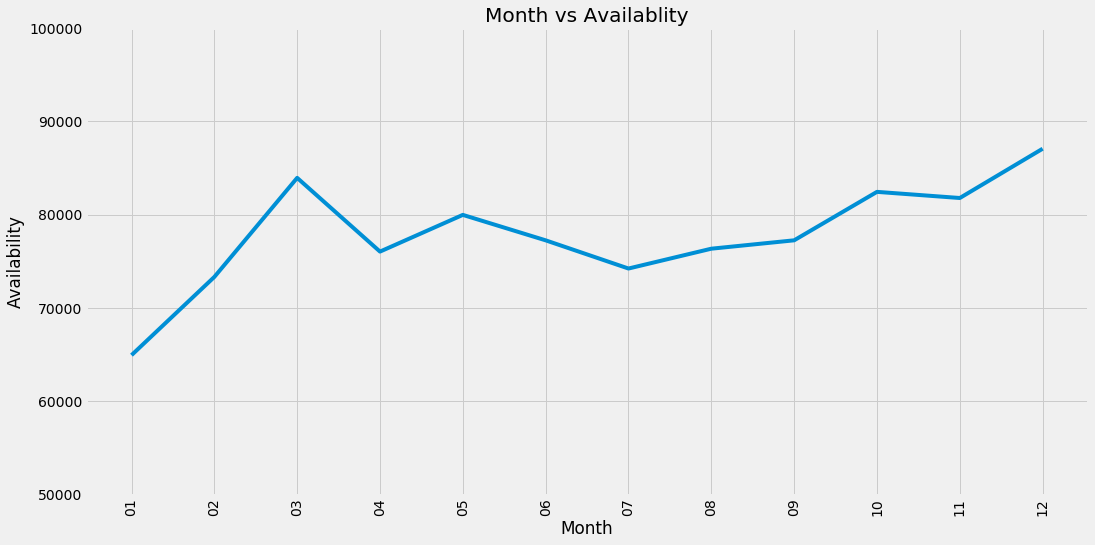

In [9]:
plt.figure(figsize=(16,8))
sb.lineplot(x='month',y='available',data=calendar_df_month_sum)
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.ylabel('Availability')
plt.ylim(50000,100000)
plt.title('Month vs Availablity')
plt.show()

In [10]:
# Groupby by month average
calendar_df_month_avg = calendar_df.groupby(['month']).mean()
calendar_df_month_avg.drop(['listing_id'],axis=1,inplace=True)
calendar_df_month_avg.reset_index(inplace=True)
calendar_df_month_avg

,month,available,price
0,01,0.566937,69.683499
1,02,0.662208,82.308439
2,03,0.709187,91.233047
3,04,0.663847,89.683700
4,05,0.675670,94.281823
5,06,0.674384,99.453597
6,07,0.627097,95.377854
7,08,0.645051,97.181255
8,09,0.674402,96.612092
9,10,0.696514,95.444659


### Plot "month vs average price"

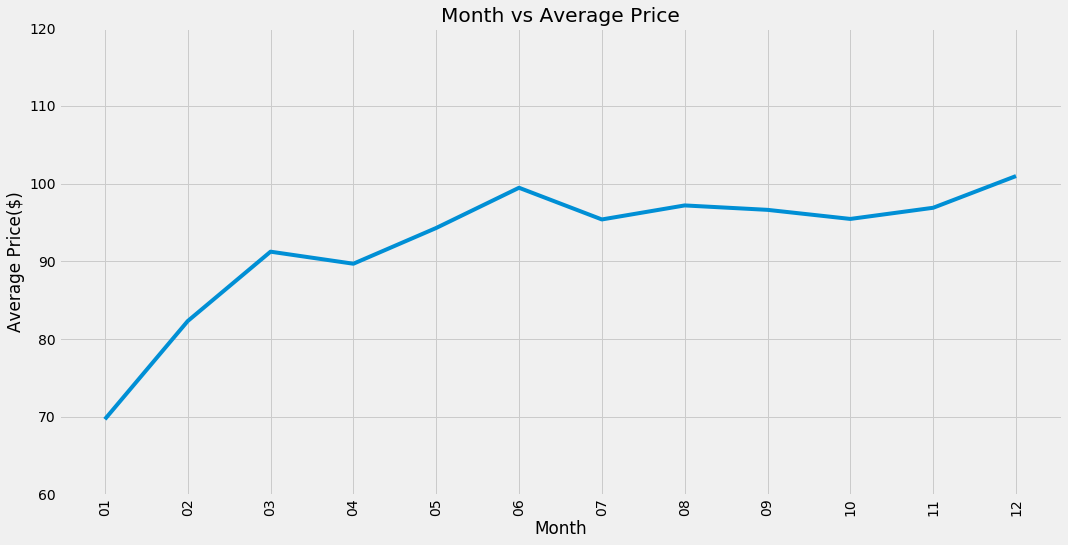

In [11]:
plt.figure(figsize=(16,8))
sb.lineplot(x='month',y='price',data=calendar_df_month_avg)
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.ylabel('Average Price($)')
plt.ylim(60,120)
plt.title('Month vs Average Price')
plt.show()

#### Average price is between \\$90-\\$100 for most part of the year. Demand increases in the summer months from June-September. Demand starts to drop after September but picks up again in the month of January and February (skiing time). 

In [12]:
# listings dataset
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [13]:
listings_df.sample(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
585,9076287,https://www.airbnb.com/rooms/9076287,20160104002432,2016-01-04,All you need in Capitol Hill,Beautiful and bright room with a private bathr...,Welcome to the Purple House! Enjoy your stay i...,Beautiful and bright room with a private bathr...,none,Quite and safe neighborhood. Very walkable and...,...,10.0,f,NaN,WASHINGTON,f,flexible,f,f,2,1.46
680,7208439,https://www.airbnb.com/rooms/7208439,20160104002432,2016-01-04,Seattle Above Lake Washington,Secluded in a cul-de-sac above the Lake Washin...,This is the bottom floor of a charming English...,Secluded in a cul-de-sac above the Lake Washin...,none,Set over Lake Washington in the cul-de-sac of ...,...,10.0,f,NaN,WASHINGTON,t,moderate,f,f,1,2.24
3422,7698721,https://www.airbnb.com/rooms/7698721,20160104002432,2016-01-04,"Easy City Access, U.W. Children's",House in a quiet neighborhood. Easy access to ...,Our home is in a quiet neighborhood near the U...,House in a quiet neighborhood. Easy access to ...,none,Our neighborhood is a great place to walk. We'...,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,2,0.27
1203,5559643,https://www.airbnb.com/rooms/5559643,20160104002432,2016-01-04,Seattle Cottage,Travel through time in quaint Magnolia. Just ...,Two-bedroom cottage with spacious master suite...,Travel through time in quaint Magnolia. Just ...,none,Relaxing neighborhood close to all of Seattle'...,...,9.0,f,NaN,WASHINGTON,f,moderate,f,f,1,1.38
923,3940265,https://www.airbnb.com/rooms/3940265,20160104002432,2016-01-04,Private Bed/Bath in Home: blue (B),Private bedroom in our home -Full-sized bed ...,The room is garden facing making it very quiet...,Private bedroom in our home -Full-sized bed ...,none,NaN,...,9.0,f,NaN,WASHINGTON,f,strict,t,t,2,2.39


In [14]:
# find missing data
listings_df_miss = pd.DataFrame((listings_df.isnull().sum())*100/len(listings_df), columns=['% Missing Values'])
listings_df_miss[listings_df_miss['% Missing Values']>0]

,% Missing Values
summary,4.635935
space,14.903091
neighborhood_overview,27.029859
notes,42.063908
transit,24.463070
thumbnail_url,8.381351
medium_url,8.381351
xl_picture_url,8.381351
host_name,0.052383
host_since,0.052383


We will fill missing values for security_deposit, cleaning_fee, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location and review_scores_value and reviews_per_month as zero

In [15]:
# create missing cols list
missing_cols = ['security_deposit','cleaning_fee','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month']
# check datatype of missing cols
listings_df[missing_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   security_deposit             1866 non-null   object 
 1   cleaning_fee                 2788 non-null   object 
 2   review_scores_rating         3171 non-null   float64
 3   review_scores_accuracy       3160 non-null   float64
 4   review_scores_cleanliness    3165 non-null   float64
 5   review_scores_checkin        3160 non-null   float64
 6   review_scores_communication  3167 non-null   float64
 7   review_scores_location       3163 non-null   float64
 8   review_scores_value          3162 non-null   float64
 9   reviews_per_month            3191 non-null   float64
dtypes: float64(8), object(2)
memory usage: 298.4+ KB


In [16]:
# fill '$0' to security deposit and cleaning fee
listings_df['security_deposit'].fillna('$0',inplace=True)
listings_df['cleaning_fee'].fillna('$0',inplace=True)
# remove commas
listings_df['security_deposit'] = listings_df['security_deposit'].apply(lambda x: ''.join(x.split(',')))
listings_df['cleaning_fee'] = listings_df['cleaning_fee'].apply(lambda x: ''.join(x.split(',')))
# remove $ and convert to float
listings_df['security_deposit'] = listings_df['security_deposit'].apply(lambda x: float(x.split('$')[1]))
listings_df['cleaning_fee'] = listings_df['cleaning_fee'].apply(lambda x: float(x.split('$')[1]))

In [17]:
# fill 0 to other missing cols
for col in missing_cols:
    listings_df[col].fillna(0,inplace=True)
    
# print result
listings_df[missing_cols].sample(10)

,security_deposit,cleaning_fee,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
198,200.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3027,0.0,0.0,94.0,10.0,9.0,10.0,10.0,9.0,10.0,1.10
1280,300.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1910,150.0,30.0,98.0,9.0,10.0,10.0,10.0,10.0,9.0,0.27
410,200.0,45.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,4.52
2988,150.0,0.0,95.0,10.0,10.0,10.0,10.0,10.0,10.0,2.66
2633,150.0,15.0,96.0,10.0,9.0,10.0,10.0,10.0,9.0,1.69
1268,0.0,99.0,95.0,10.0,10.0,9.0,10.0,10.0,9.0,0.52
822,0.0,50.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,4.27
1511,200.0,40.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0.67


In [18]:
# convert amenities to numerical data
listings_df['amenities'] = listings_df['amenities'].apply(lambda x: x[1:-1].split(','))
listings_df['TV'] = 0
listings_df['Internet'] = 0
listings_df['Kitchen'] = 0
listings_df['Free_parking'] = 0
listings_df['Washer_dryer'] = 0
listings_df['AC'] = 0
listings_df['Smoke_detector'] = 0

In [19]:
for i in range(len(listings_df)):
    if 'TV' in listings_df.loc[i,'amenities']:
        listings_df.loc[i,'TV'] = 1
    if 'Internet' in listings_df.loc[i,'amenities']:
        listings_df.loc[i,'Internet'] = 1
    if 'Kitchen' in listings_df.loc[i,'amenities']:
        listings_df.loc[i,'Kitchen'] = 1 
    if '"Free Parking on Premises"' in listings_df.loc[i,'amenities']:
        listings_df.loc[i,'Free_parking'] = 1
    if 'Washer' in listings_df.loc[i,'amenities']:
        listings_df.loc[i,'Washer_dryer'] = 1
    if '"Air Conditioning"' in listings_df.loc[i,'amenities']:
        listings_df.loc[i,'AC'] = 1
    if '"Smoke Detector"' in listings_df.loc[i,'amenities']:
        listings_df.loc[i,'Smoke_detector'] = 1

In [20]:
# clean price, monthly price and weekly price formats
# fill missing values as 0
listings_df['price'].fillna('$0', inplace=True)
listings_df['monthly_price'].fillna('$0', inplace=True)
listings_df['weekly_price'].fillna('$0', inplace=True)
# remove commas from price
listings_df['price'] = listings_df['price'].apply(lambda x: ''.join(x.split(',')))
listings_df['monthly_price'] = listings_df['monthly_price'].apply(lambda x: ''.join(x.split(',')))
listings_df['weekly_price'] = listings_df['weekly_price'].apply(lambda x: ''.join(x.split(',')))
# convert to float
listings_df['price'] = listings_df['price'].apply(lambda x: float(x.split('$')[1]))
listings_df['monthly_price'] = listings_df['monthly_price'].apply(lambda x: float(x.split('$')[1]))
listings_df['weekly_price'] = listings_df['weekly_price'].apply(lambda x: float(x.split('$')[1]))
listings_df[['price','monthly_price','weekly_price']].sample(15)

,price,monthly_price,weekly_price
1830,69.0,1100.0,299.0
2179,150.0,2950.0,825.0
3471,110.0,0.0,0.0
2368,35.0,0.0,0.0
3365,100.0,0.0,0.0
655,90.0,0.0,0.0
2930,105.0,0.0,0.0
3398,90.0,0.0,600.0
2445,63.0,0.0,470.0
3102,93.0,0.0,0.0


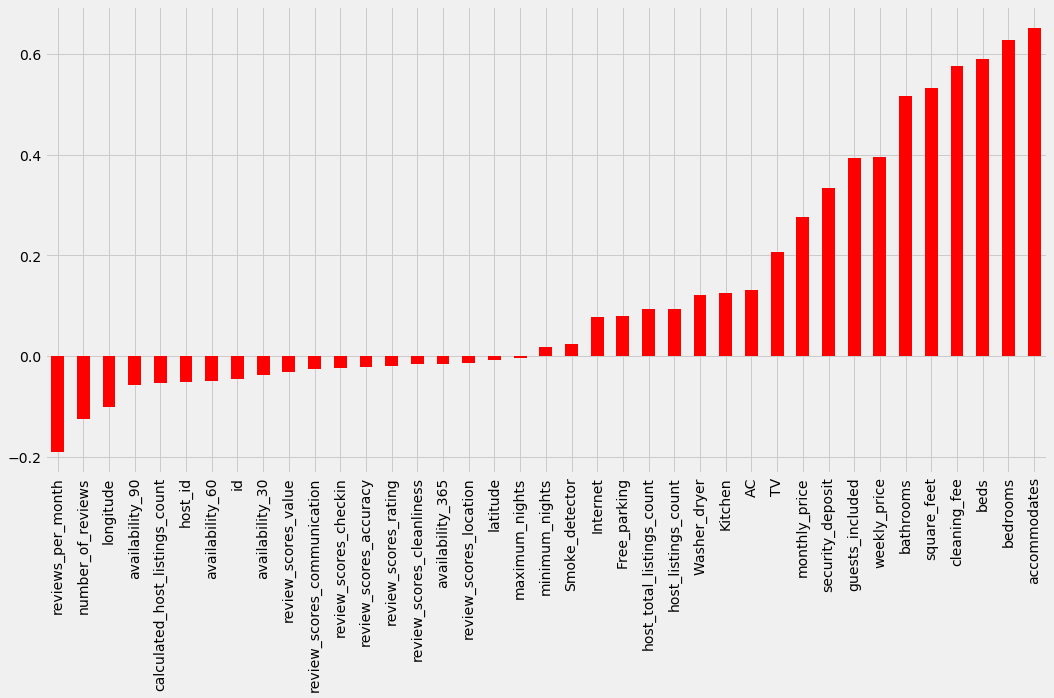

In [21]:
# find correlation to price
plt.figure(figsize=(16,8))
listings_df.corr()['price'].dropna().sort_values()[:-1].plot(kind='bar', color='red')
plt.show()

It is evident from the above result that bigger the rental place, higher the fee. This is expected. As a Seattle homeowner, size of an existing house cannot be changed. Our interest is in finding additional information apart from dependencies on the size of the house that affects price. Hence we will remove the following columns from the dataset.
* accommodates
* bedrooms
* beds
* square_feet
* bathrooms
* guests_included

We will also remove monthly price and weekly price
* weekly_price
* monthly_price

Also in the correlation, interestingly we find that cleaning_fee and security_deposit have a higher correlation to price. Is that because cleaning_fee and security_deposit is a direct factor of the size of the house? Let's find out

In [22]:
listings_df.corr()['cleaning_fee'].dropna().sort_values()

reviews_per_month                -0.181479
host_id                          -0.150881
id                               -0.122722
number_of_reviews                -0.122001
longitude                        -0.078980
maximum_nights                   -0.005981
latitude                          0.003279
availability_90                   0.029839
minimum_nights                    0.030623
availability_60                   0.031145
availability_30                   0.035826
review_scores_value               0.043518
review_scores_communication       0.050816
review_scores_checkin             0.050983
review_scores_accuracy            0.053138
availability_365                  0.053624
review_scores_rating              0.055922
Smoke_detector                    0.059321
review_scores_location            0.060695
review_scores_cleanliness         0.070550
Internet                          0.083274
Free_parking                      0.124628
calculated_host_listings_count    0.160882
AC         

Our theory proved right. Cleaning fee has a high correlation to size of the house. It also has a high correlation to security_deposit. We will remove these two columns as well from the dataset.

In [23]:
# remove cols
remove_cols = ['accommodates','bedrooms','beds','square_feet','bathrooms','guests_included','weekly_price','monthly_price','cleaning_fee','security_deposit']
listings_df.drop(remove_cols,axis=1,inplace=True)

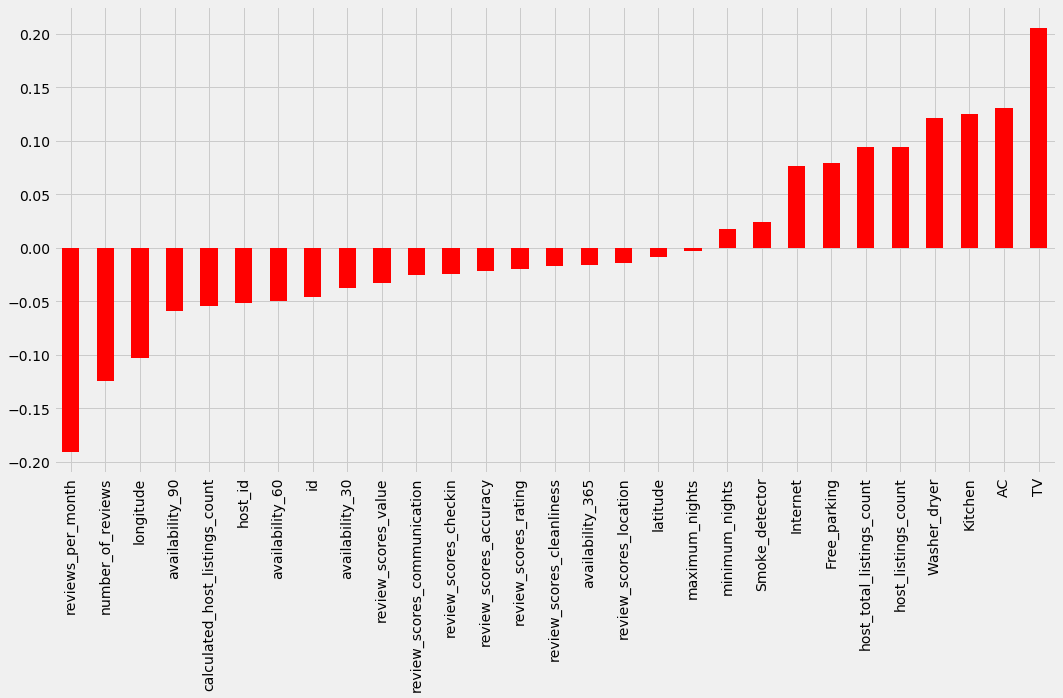

In [24]:
# Re-run the correlation to price with the remaining features
plt.figure(figsize=(16,8))
listings_df.corr()['price'].dropna().sort_values()[:-1].plot(kind='bar', color='red')
plt.show()

Basic amenities like TV, AC, Kitchen, Washer, Dryer, Free Parking on premises, Internet etc. increase the price of a property. But all categories related to reviews have a negative relationship with price. What does this mean? We can assume more reviews equal to more guests in a particular property. The more guest in a particular property, the more affordable it is. This proves that price vs affordability is a trade off. As a homeowner I want to increase my daily rental price but I don't want to increase it beyond the affordability level of an average Airbnb user.

Let's look at prices per number_of_reviews to find what is the most common price ranges

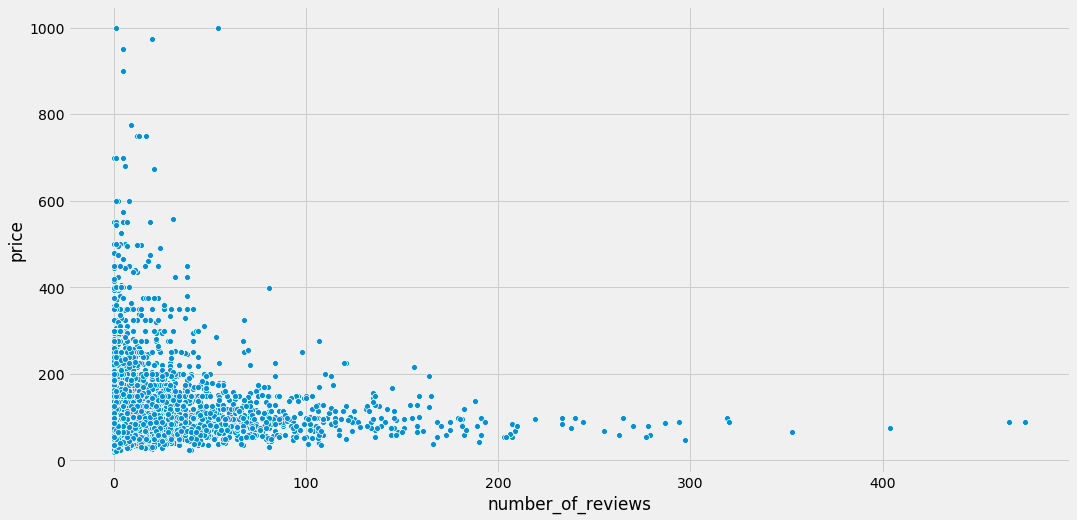

In [26]:
plt.figure(figsize=(16,8))
sb.scatterplot(x='number_of_reviews',y='price',data=listings_df)
plt.show()

The trade-off is evident from the above plot. More reviews in the lower price range (typically <$150) 

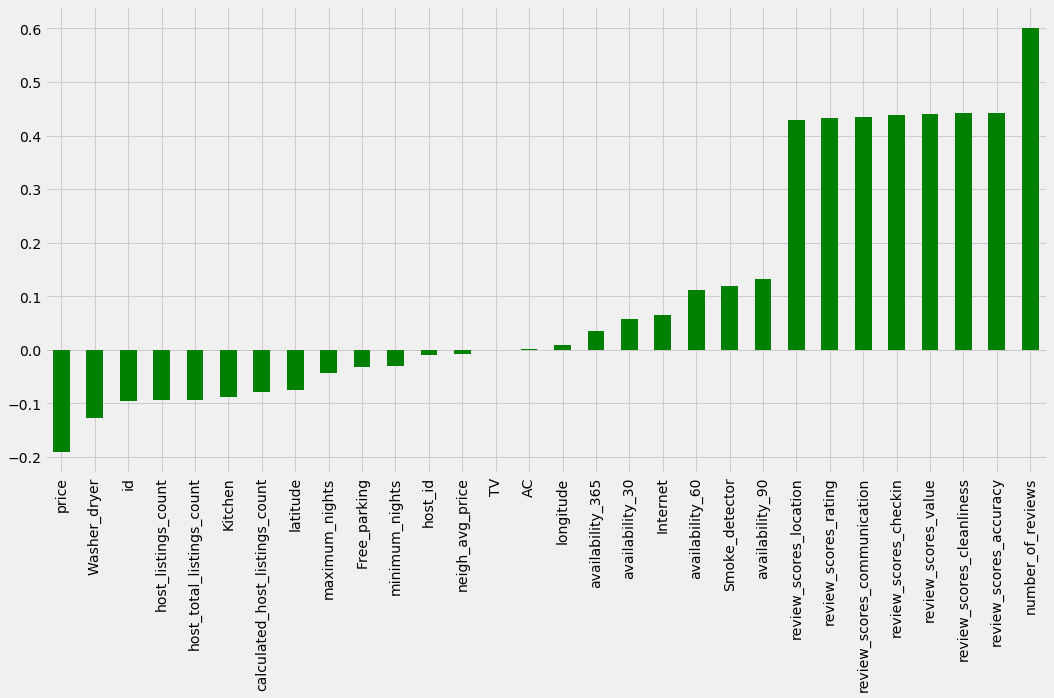

In [75]:
# Run the correlation to reviews per month with the remaining features
plt.figure(figsize=(16,8))
listings_df.corr()['reviews_per_month'].dropna().sort_values()[:-1].plot(kind='bar', color='green')
plt.show()

In [49]:
# groupby neighbourhood
listings_df_neigh = listings_df.groupby(['neighbourhood_cleansed']).mean()
listings_df_neigh.reset_index(inplace=True)
listings_df_neigh.sort_values(['price'],inplace=True,ascending=False)

In [50]:
listings_df_neigh.sample(6)

,neighbourhood_cleansed,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,price,minimum_nights,...,license,calculated_host_listings_count,reviews_per_month,TV,Internet,Kitchen,Free_parking,Washer_dryer,AC,Smoke_detector
27,Haller Lake,5.203538e+06,2.016010e+13,1.589626e+07,1.533333,1.533333,47.715400,-122.334266,103.400000,2.933333,...,NaN,1.533333,0.990000,0.533333,0.666667,0.866667,0.866667,0.733333,0.133333,0.866667
62,Rainier Beach,5.987419e+06,2.016010e+13,1.957865e+07,6.388889,6.388889,47.513951,-122.258468,68.555556,1.666667,...,NaN,6.055556,2.007778,0.333333,0.500000,0.777778,0.944444,0.611111,0.000000,0.944444
78,View Ridge,7.468886e+06,2.016010e+13,2.815957e+07,1.142857,1.142857,47.681735,-122.271460,139.000000,2.142857,...,NaN,1.000000,1.388571,0.857143,0.857143,1.000000,0.714286,1.000000,0.142857,1.000000
4,Belltown,5.521046e+06,2.016010e+13,1.230983e+07,32.926724,32.926724,47.615147,-122.345487,162.893162,2.141026,...,NaN,4.987179,1.722991,0.820513,0.782051,0.974359,0.435897,0.914530,0.500000,0.871795
45,Meadowbrook,6.385383e+06,2.016010e+13,1.943537e+07,1.222222,1.222222,47.706630,-122.295389,98.666667,1.333333,...,NaN,1.222222,1.536667,0.444444,0.555556,0.888889,0.888889,0.777778,0.000000,1.000000
50,North Admiral,5.518042e+06,2.016010e+13,1.516661e+07,1.673469,1.673469,47.578612,-122.386513,146.408163,2.183673,...,NaN,1.408163,1.508776,0.795918,0.795918,0.836735,0.612245,0.734694,0.142857,0.775510


Neighbourhood vs Average Price

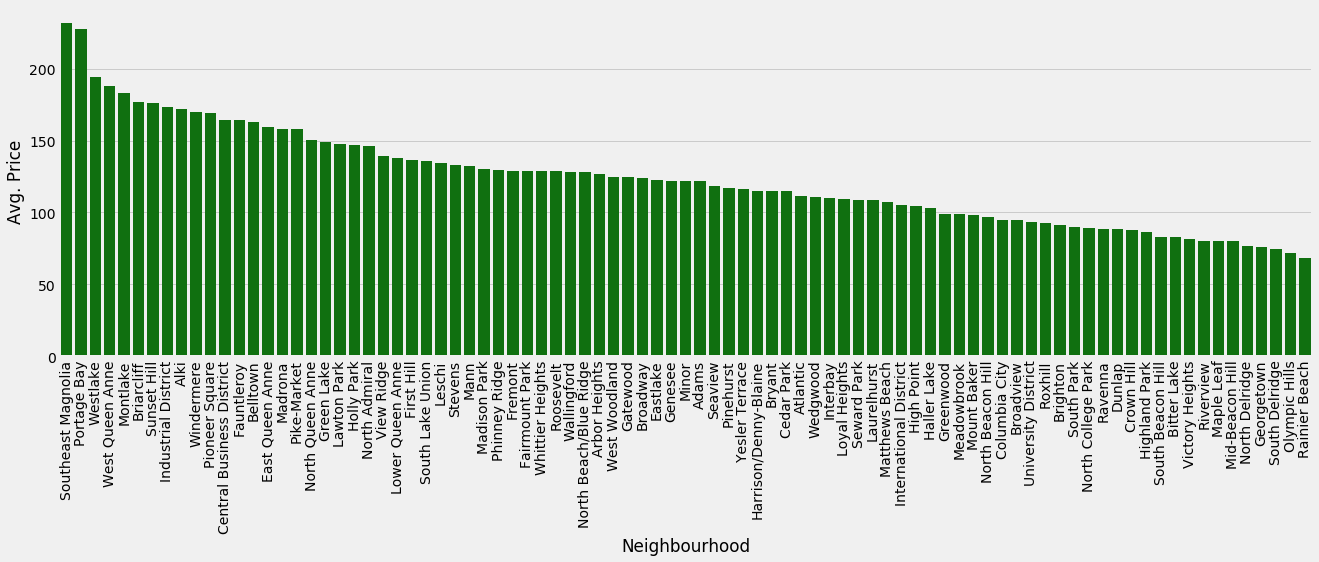

In [51]:
plt.figure(figsize=(20,6))
sb.barplot(x='neighbourhood_cleansed',y='price',data=listings_df_neigh,color='green')
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood')
plt.ylabel('Avg. Price')
plt.show()

Let's look at the average price geographically

In [60]:
# append average price by neighborhood to the original listings dataframe
listings_df['neigh_avg_price'] = listings_df['neighbourhood_cleansed'].apply(lambda x: float(listings_df_neigh[listings_df_neigh['neighbourhood_cleansed']== x]['price'].values))

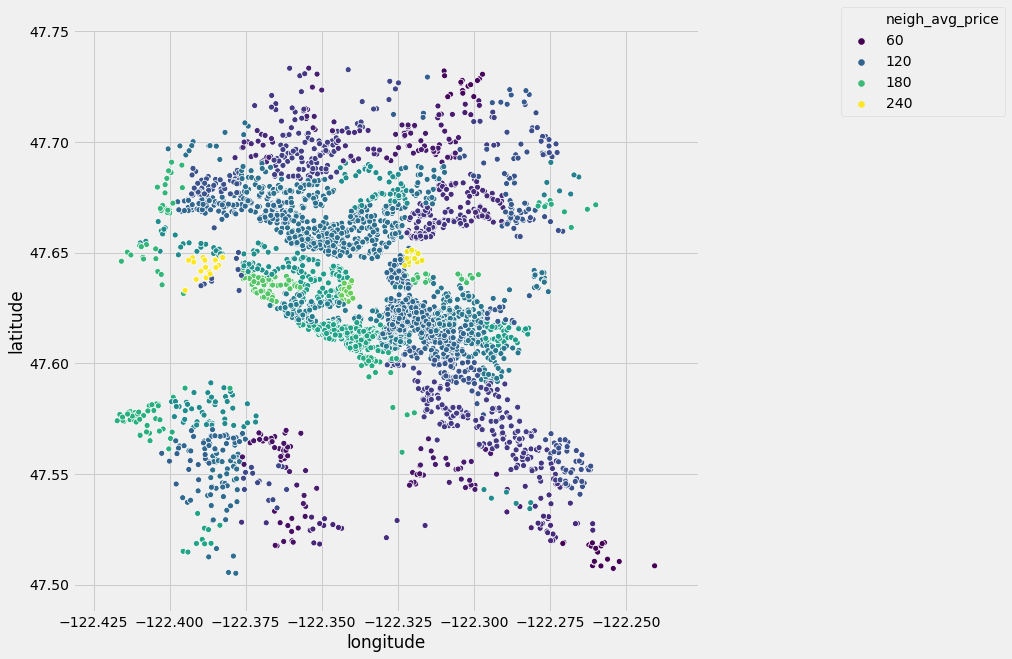

In [74]:
plt.figure(figsize=(10,10))
sb.scatterplot(x='longitude',y='latitude',data=listings_df,hue='neigh_avg_price',palette='viridis')
plt.legend(loc='upper right',bbox_to_anchor=(1.5, 1.05))
plt.show()

### <div id="conclusions">3. Conclusions</div>

1. The demand increases in the summer months of June, July and August and it drops afterwards. There is a spike in demand again in January probably due to the skiing season. The demand again drops after that. The average price of a rental is quit high starting June in the lates \\$90s. Then it drops and remains in the mid \\$70s till summer.

2. The top six neighbourhoods with the highest average rental prices are Southeast Magnolia, Portage Bay, Westlake, West Queen Anne, Montlake and Briarcliff. These locations are waterfront locations and are within 5 miles of Downtown Seattle.

3. Apart from the size of the rental property, providing amenities like TV, Internet, Kitchen, AC, Heating, Washer/Dryer and free parking space increase the price of the rental.